<a href="https://colab.research.google.com/github/lmcanavals/dip/blob/main/para_el_EA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sharpening in Space Domain

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

In [ ]:
def show(im, size=8, color=None):
  _, ax = plt.subplots(figsize=(size, size))
  if color:
    ax.imshow(im, interpolation="nearest", cmap=color)
  else:
    ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.axis("off")
  plt.show()

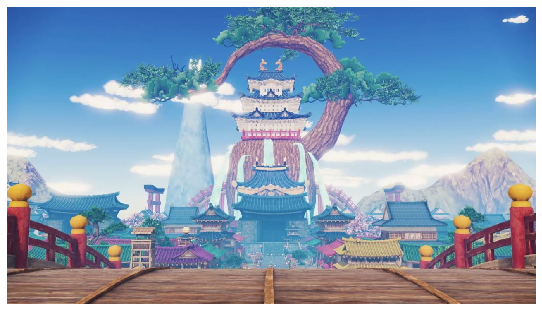

In [ ]:
im = loadImg("wano.jpg")
show(im)

In [ ]:
im.shape

(720, 1280, 3)

(720, 1280)


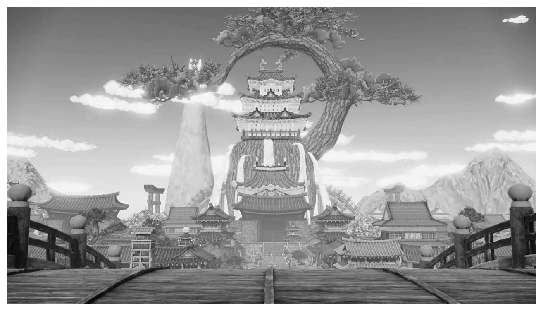

In [ ]:
imgs = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(imgs.shape)
show(imgs, color="gray")

(1024, 1024, 3)


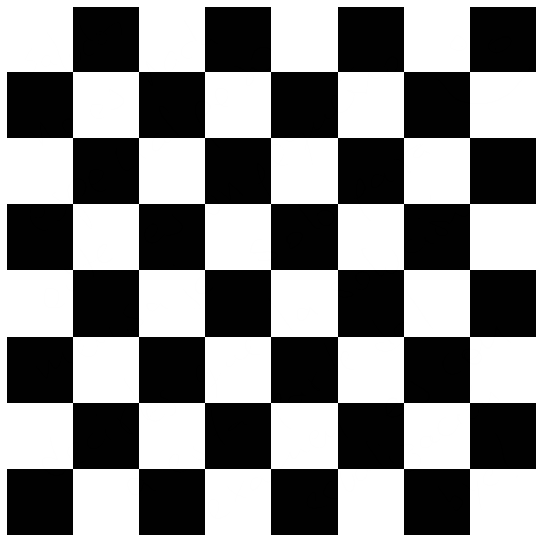

In [ ]:
im2 = loadImg("incognitus.tif")
print(im2.shape)
show(im2)

(1024, 1024)


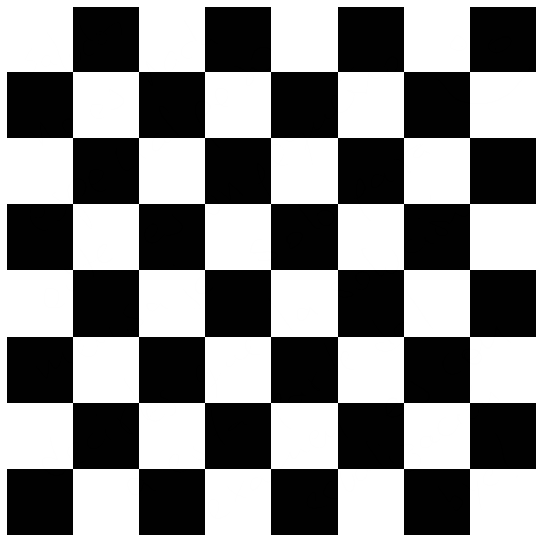

In [ ]:
imgs2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
print(imgs2.shape)
show(imgs2, color="gray")

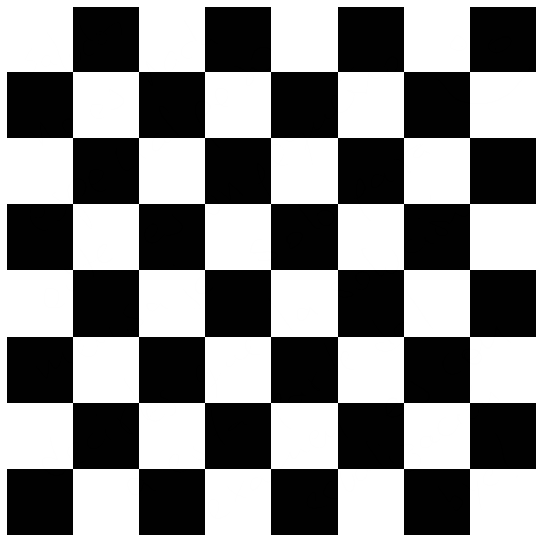

In [ ]:
gray = cv2.equalizeHist(imgs2)
show(imgs2, color="gray")

In [ ]:
def equalize_hist(im):
  rows, cols = im.shape
  hist, bins = np.histogram(im, bins=256, range=(0, 256))
  hist = hist / (rows * cols)
  
  accum = np.zeros((256))
  accum[0] = hist[0]
  for i in range(1, 256):
    accum[i] = accum[i - 1] + hist[i]

  out = np.zeros((rows, cols))

  for i in range(rows):
    for j in range(cols):
      out[i, j] = accum[im[i, j]]

  return np.floor(256*out + 0.5).astype(np.int)

In [ ]:
def test(imgs):
  imgseq = equalize_hist(imgs)
  plt.subplots(figsize=(15, 15))
  plt.subplot(2, 2, 1)
  plt.imshow(imgs, 'gray')
  plt.title("Normal")
  plt.axis("off")
  plt.subplot(2, 2, 2)
  plt.hist(imgs.ravel(), 256)
  plt.axis("off")
  plt.subplot(2, 2, 3)
  plt.imshow(imgseq, 'gray')
  plt.title("Equalized")
  plt.axis("off")
  plt.subplot(2, 2, 4)
  plt.hist(imgseq.ravel(), 256)
  plt.axis("off")

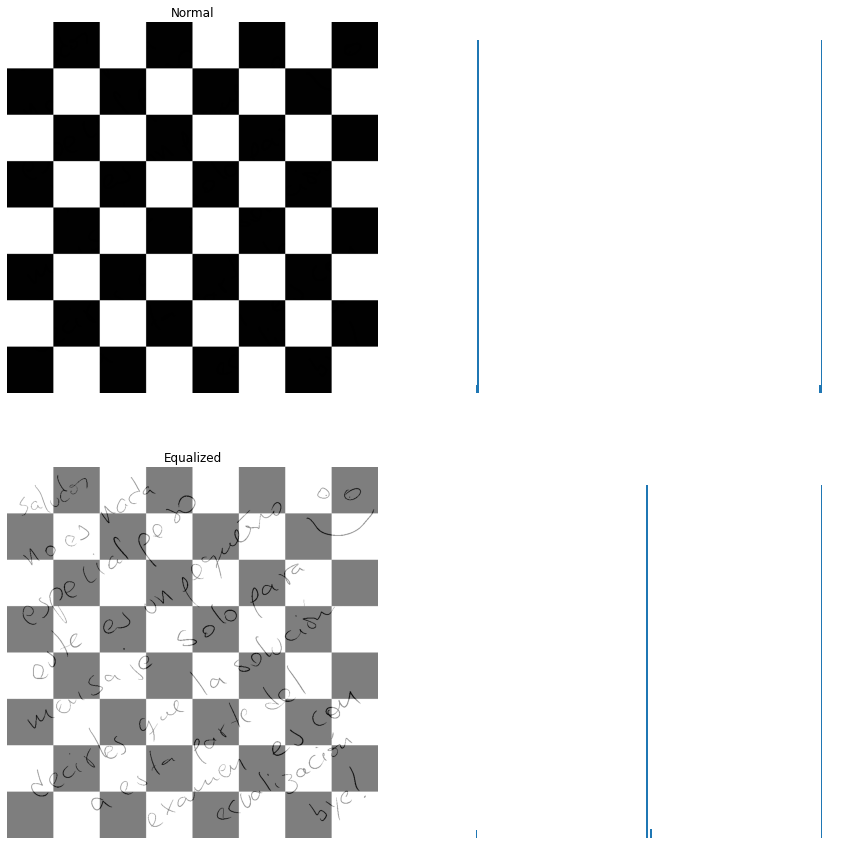

In [ ]:
test(imgs2)

1 255


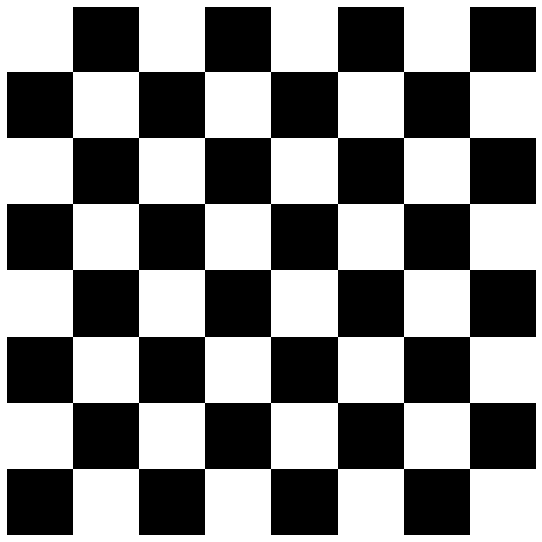

In [ ]:
imex = np.zeros((1024, 1024), dtype=np.int)
chessb = np.ones((8, 8), dtype=np.int)
chessb[::2, ::2] = 255
chessb[1::2, 1::2] = 255
for i in range(8):
  for j in range(8):
    imex[i*128:(i+1)*128, j*128:(j+1)*128] = chessb[i, j]

print(np.min(imex), np.max(imex))
show(imex, color="gray")

(1024, 1024, 3)


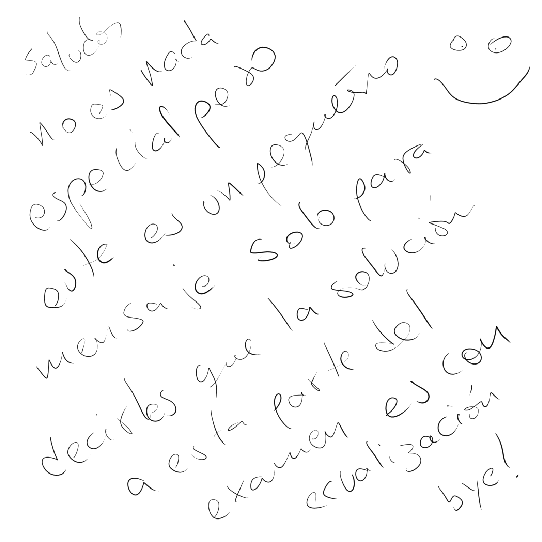

In [ ]:
im3 = loadImg("msg.tif")
print(im3.shape)
show(im3)

(1024, 1024) 0 255


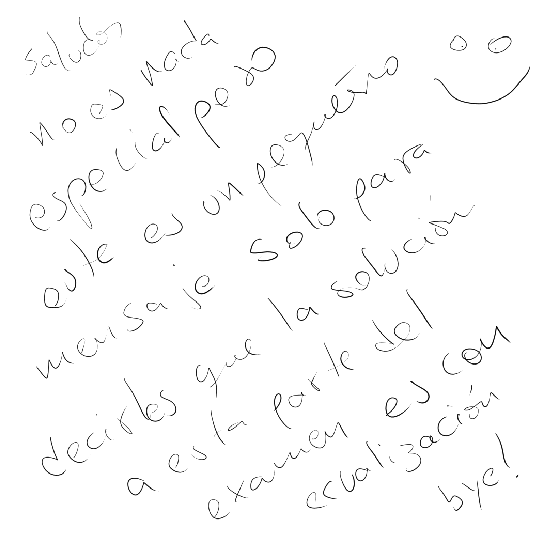

In [ ]:
imgs3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
print(imgs3.shape, np.min(imgs3), np.max(imgs3))
show(imgs3, color="gray")

(1024, 1024) 0 255


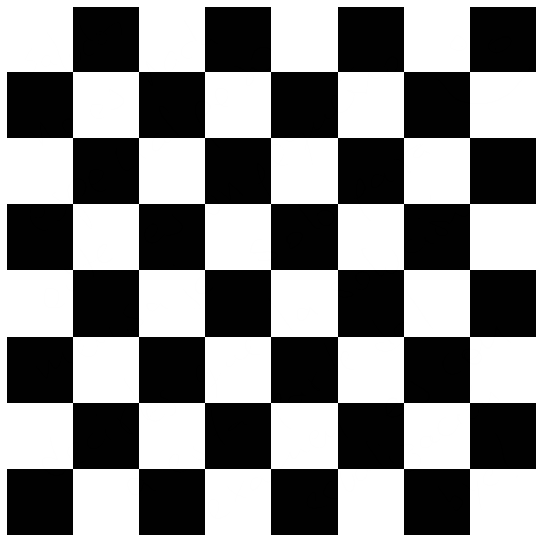

In [ ]:
for i in range(1024):
  for j in range(1024):
    imgs3[i, j] = imex[i, j] - (1 if imgs3[i, j] < 200 else 0)
print(imgs3.shape, np.min(imgs3), np.max(imgs3))
show(imgs3, color="gray")

255
0


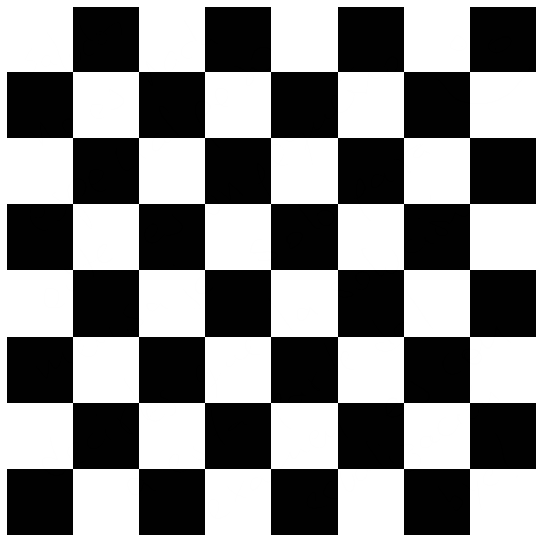

In [ ]:
imex3 = np.zeros((1024, 1024, 3), dtype=np.int)
imex3[:,:,0] = imgs3
imex3[:,:,1] = imgs3
imex3[:,:,2] = imgs3

print(np.max(imex3))
print(np.min(imex3))
show(imex3)

In [ ]:
cv2.imwrite("incognitus.tif", imex3)

True

In [ ]:
imgs4 = cv2.cvtColor(imex3, cv2.COLOR_BGR2GRAY)
print(imgs4.shape, np.min(imgs4), np.max(imgs4))
show(imgs4, color="gray")

error: ignored

In [ ]:
def test(imgs, mask):
  imgs2 = cv2.filter2D(src=imgs, ddepth=-1, kernel=mask)
  plt.subplots(figsize=(10, 10))
  plt.subplot(1, 2, 1)
  plt.imshow(imgs, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(imgs2, cmap="gray")
  plt.axis("off")
  plt.show()